<a href="https://colab.research.google.com/github/Ahmed-Magdi1/Lab3_Machine_Vision/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question_2

## 1. Use an image you own or have captured (image.jpg).

In [3]:
# Important libraries
import  cv2 as cv  #Define computer vision library
import numpy as np #Define numpy library
from matplotlib import pyplot as plt #Define matplotlib library

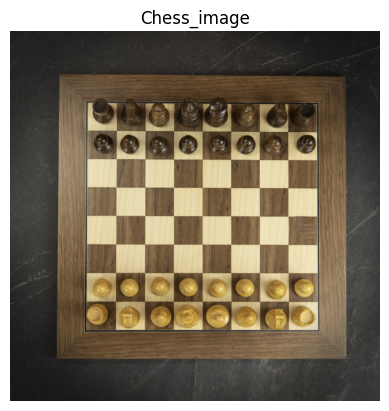

In [7]:
colored_image = cv.imread('/content/chess.jpg') #Read the image
rgb_image = cv.cvtColor(colored_image, cv.COLOR_BGR2RGB) #Convert the image from BGR to RGB
plt.imshow(rgb_image) #Show the image
plt.title('Chess_image')  # Set the title
plt.axis('off')  # Turn off the axis
plt.show()  # Show the plot

## 2. Apply the following transformations to the image and determine the corresponding transformation matrix H for each case:

### a. Translate the image by two different sets of points (𝑥1,𝑦1) and (𝑥2,𝑦2).

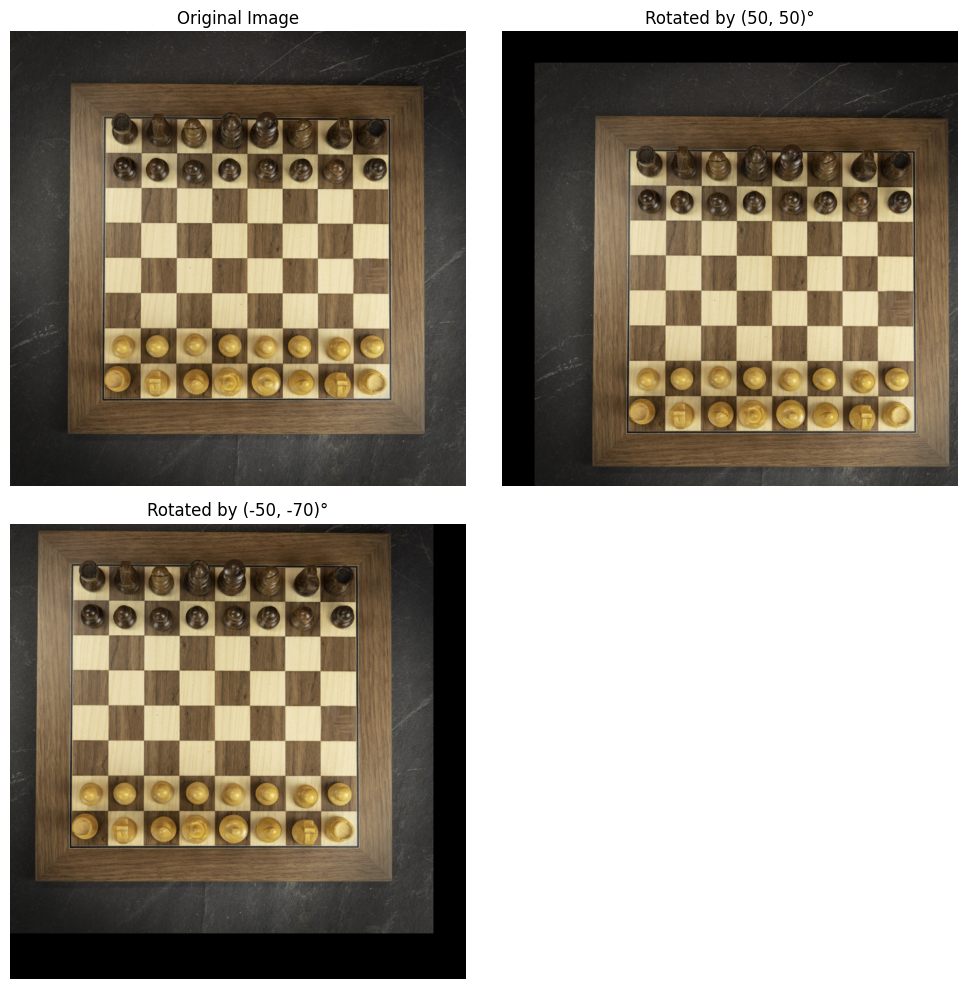

In [60]:
# The translation vectors (x1, y1) and (x2, y2)
T1 = (50, 50)  # Translation by (x1, y1)
T2 = (-50, -70)  # Translation by (x2, y2)

# Translation matrices
H1 = np.float32([[1, 0, T1[0]], [0, 1, T1[1]]])  # For translation by (x1, y1)
H2 = np.float32([[1, 0, T2[0]], [0, 1, T2[1]]])  # For translation by (x2, y2)

# Apply the translation
translated_image1 = cv.warpAffine(rgb_image, H1, (colored_image.shape[1], colored_image.shape[0]))
translated_image2 = cv.warpAffine(rgb_image, H2, (colored_image.shape[1], colored_image.shape[0]))

# Grid for plotitng
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# The original image
axes[0, 0].imshow(rgb_image)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# The rotated images
axes[0, 1].imshow(translated_image1)
axes[0, 1].set_title(f'Rotated by {T1}°')
axes[0, 1].axis('off')

axes[1, 0].imshow(translated_image2)
axes[1, 0].set_title(f'Rotated by {T2}°')
axes[1, 0].axis('off')
axes[1, 1].axis('off')  # Leave the bottom-right cell empty

plt.tight_layout()
plt.show()

Transformation matrix H:

H_1=
\begin{bmatrix}
1 & 0 & x_1 \\
0 & 1 & y_1 \\
0 & 0 & 1
\end{bmatrix}


H_2=
\begin{bmatrix}
1 & 0 & x_2 \\
0 & 1 & y_2 \\
0 & 0 & 1
\end{bmatrix}



### b. Rotate the image by two different angles 𝜃1 and 𝜃2.

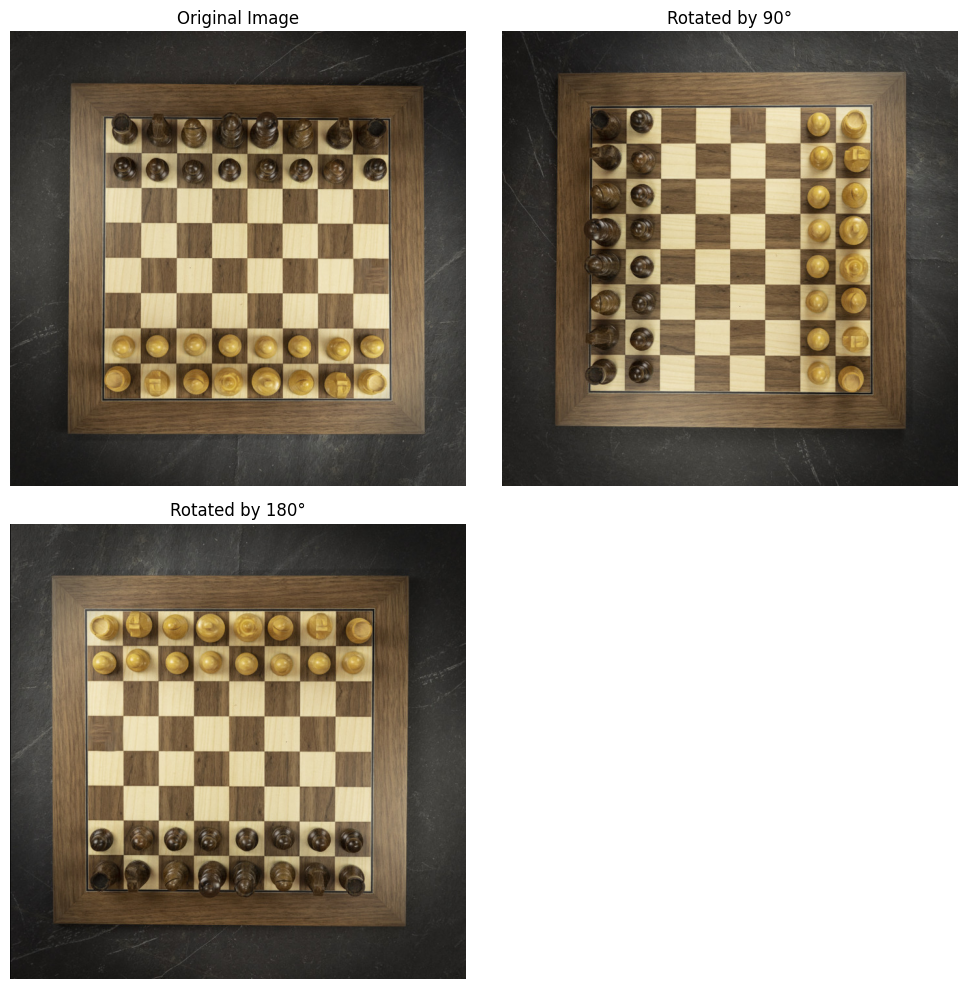

In [34]:
# The rotation angles (theta1, theta2)
theta1 = 90  # Rotation by 90 degrees
theta2 = 180  # Rotation by 180 degrees

# Image center
center = (rgb_image.shape[1] // 2, rgb_image.shape[0] // 2)

# The rotation matrices
M1 = cv.getRotationMatrix2D(center, theta1, 1)  # Scale factor (1 = no scaling)
M2 = cv.getRotationMatrix2D(center, theta2, 1)

# Apply the rotations
rotated_image1 = cv.warpAffine(rgb_image, M1, (rgb_image.shape[1], rgb_image.shape[0]))
rotated_image2 = cv.warpAffine(rgb_image, M2, (rgb_image.shape[1], rgb_image.shape[0]))

# Grid for plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display the original image
axes[0, 0].imshow(rgb_image)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Display the rotated images
axes[0, 1].imshow(rotated_image1)
axes[0, 1].set_title(f'Rotated by {theta1}°')
axes[0, 1].axis('off')

axes[1, 0].imshow(rotated_image2)
axes[1, 0].set_title(f'Rotated by {theta2}°')
axes[1, 0].axis('off')
axes[1, 1].axis('off')  # Leave the bottom-right cell empty

plt.tight_layout()
plt.show()

Transformation matrix H:

H = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) & (1 - \cos(\theta)) \cdot c_x + \sin(\theta) \cdot c_y \\
\sin(\theta) & \cos(\theta) & (1 - \cos(\theta)) \cdot c_y - \sin(\theta) \cdot c_x \\
0 & 0 & 1
\end{bmatrix}

(c_x, c_y​) is the center of rotation(image)

### c. Perform scaling to enlarge (scale up) and reduce (scale down) the image.

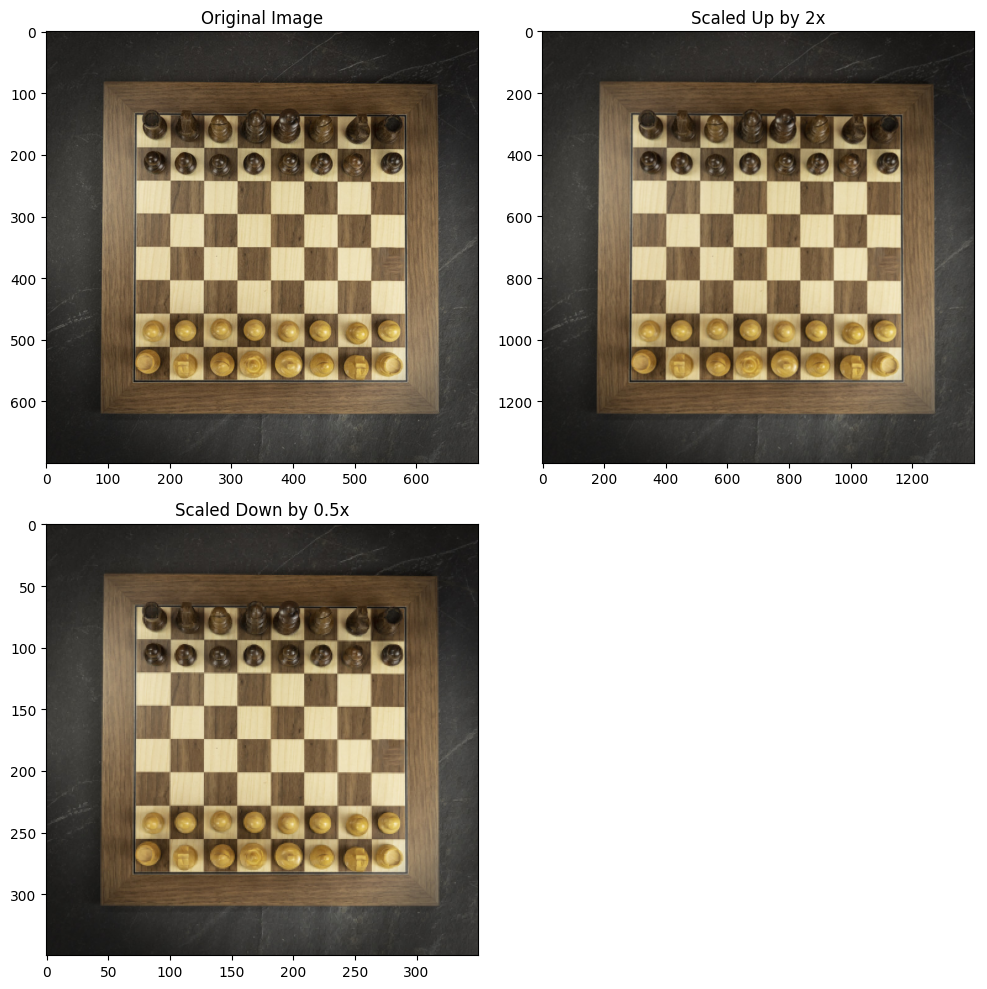

In [35]:
# Scaling factors
scale_up = 2 # 2x larger
scale_down = 0.5  # 0.5x smaller

# Apply scaling
scaled_up_image = cv.resize(rgb_image, None, fx=scale_up, fy=scale_up, interpolation=cv.INTER_LINEAR)
scaled_down_image = cv.resize(rgb_image, None, fx=scale_down, fy=scale_down, interpolation=cv.INTER_LINEAR)

# Grid for plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display the original image
axes[0, 0].imshow(rgb_image)
axes[0, 0].set_title('Original Image')


# Display the scaled-up and scaled-down images
axes[0, 1].imshow(scaled_up_image)
axes[0, 1].set_title(f'Scaled Up by {scale_up}x')

axes[1, 0].imshow(scaled_down_image)
axes[1, 0].set_title(f'Scaled Down by {scale_down}x')
axes[1, 1].axis('off')  # Leave the bottom-right cell empty

plt.tight_layout()
plt.show()

Transformation matrix H:


H = \begin{bmatrix}
s_x & 0 & 0 \\
0 & s_y & 0 \\
0 & 0 & 1
\end{bmatrix}


(s_x, s_y) : The scalling factors

### d. Apply a projective transformation.

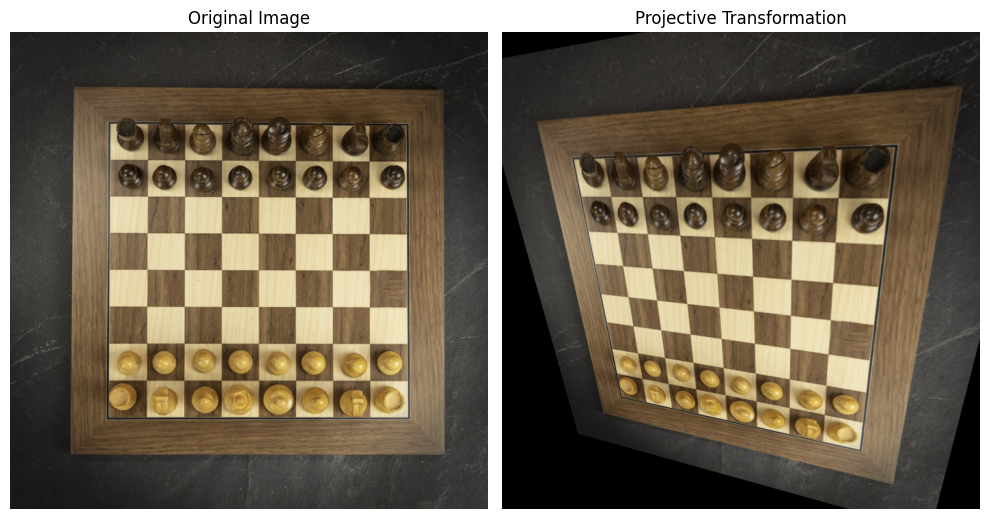

In [49]:
# The points (source and destination)

# Source points (original image coordinates)
src_pts = np.float32([[50, 50], [450, 50], [50, 450], [450, 450]])

# Destination points (perspective points)
dst_pts = np.float32([[10, 100], [400, 50], [100, 450], [400, 500]])

# The perspective transformation matrix
K = cv.getPerspectiveTransform(src_pts, dst_pts)

# Apply the projective transformation
projected_image = cv.warpPerspective(rgb_image, K, (rgb_image.shape[1], rgb_image.shape[0]))

# Grid plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Display the original image
axes[0].imshow(rgb_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the projected image
axes[1].imshow(projected_image)
axes[1].set_title('Projective Transformation')
axes[1].axis('off')

plt.tight_layout()
plt.show()

Transformation matrix H:


H = \begin{bmatrix}
h_1 & h_2 & h_3 \\
h_4 & h_5 & h_6 \\
h_7 & h_8 & 1
\end{bmatrix}

(h1, h2, h3, h4, h5, h6, h7, h8) : The selected points.

### e. Perform a combination of translation and rotation.

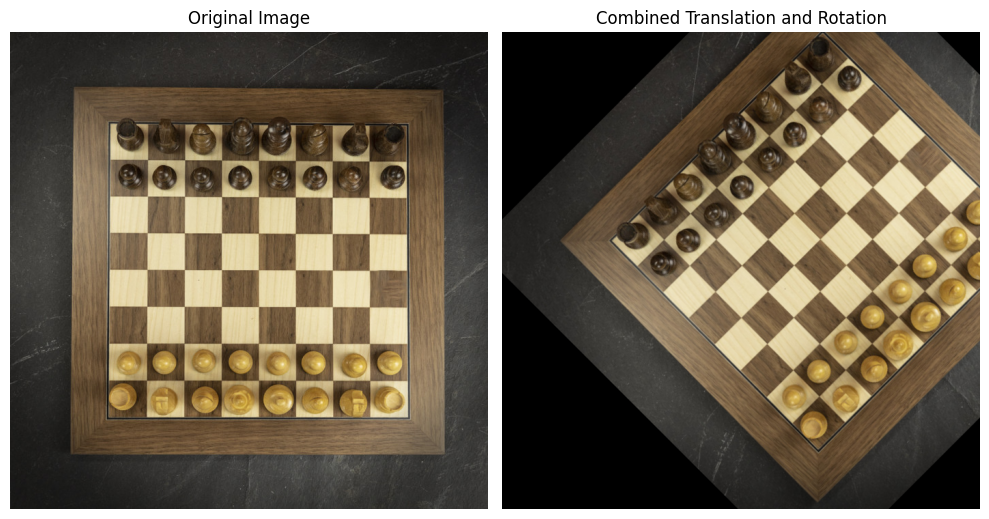

In [54]:
t_x = 100  # translation along the x-axis
t_y = 50   # translation along the y-axis

theta = 45  # rotate by 45 degrees

# The image center for rotation
center = (rgb_image.shape[1] // 2, rgb_image.shape[0] // 2)

# The translation matrix
T = np.float32([[1, 0, t_x], [0, 1, t_y]])

# The rotation matrix (the rotation is around the center)
R = cv.getRotationMatrix2D(center, theta, 1)  # The scale factor (1 = no scaling)

# First apply the translation, then apply the rotation
combined_matrix = np.vstack([R, [0, 0, 1]])  # Convert R to a 3x3 matrix by adding [0, 0, 1] as the third row
combined_matrix = combined_matrix @ np.vstack([T, [0, 0, 1]])  # Translation

# Apply the combined transformation
transformed_image = cv.warpAffine(rgb_image, combined_matrix[:2, :], (rgb_image.shape[1], rgb_image.shape[0]))

# Grid for plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Display the original image
axes[0].imshow(rgb_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the transformed image
axes[1].imshow(transformed_image)
axes[1].set_title(f'Combined Translation and Rotation')
axes[1].axis('off')

plt.tight_layout()
plt.show()

Transformation matrix H:

Translation Matrix:

T = \begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}


Rotation Matrix:

R = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1
\end{bmatrix}

Overall Matrix:

H = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) & t_x \\
\sin(\theta) & \cos(\theta) & t_y \\
0 & 0 & 1
\end{bmatrix}



### f. Perform a combination of (a), (b), (c) and (d).

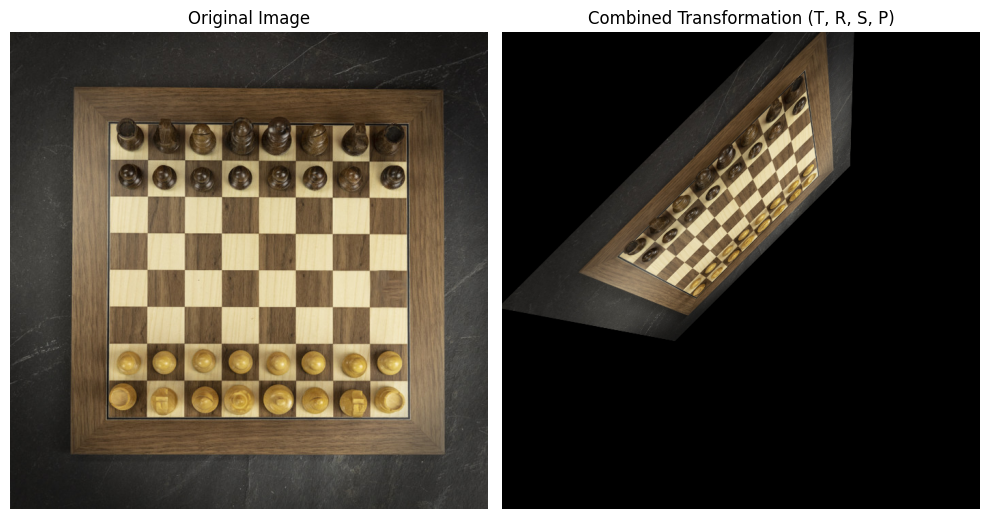

In [59]:
t_x = 100  # translation along the x-axis
t_y = 50   # translation along the y-axis

theta = 45  # rotate by 45 degrees

s_x = 1.5  # scale along the x-axis
s_y = 1.5  # scale along the y-axis

# The projective transformation matrix
h_1, h_2, h_3, h_4, h_5, h_6, h_7, h_8 = 1, 0, 50, 0, 1, 100, 0.001, 0.001  # Projective transformation

# Create the translation matrix (from 2x3 to 3x3 by adding a row of [0, 0, 1])
T = np.float32([[1, 0, t_x], [0, 1, t_y], [0, 0, 1]])

# Create the rotation matrix (from 2x3 to 3x3 by adding a row of [0, 0, 1])
R = cv.getRotationMatrix2D((rgb_image.shape[1] // 2, rgb_image.shape[0] // 2), theta, 1)
R = np.vstack([R, [0, 0, 1]])  # Convert to 3x3 matrix

# Create the scaling matrix (from 2x3 to 3x3 by adding a row of [0, 0, 1])
S = np.float32([[s_x, 0, 0], [0, s_y, 0], [0, 0, 1]])

# The projective transformation matrix
P = np.float32([[h_1, h_2, h_3], [h_4, h_5, h_6], [h_7, h_8, 1]])

### Combine the matrices ###
# Apply T -> R -> S -> P
H_final = P @ S @ R @ T

# The final combined transformation
final_transformed_image = cv.warpPerspective(rgb_image, H_final, (rgb_image.shape[1], rgb_image.shape[0]))

# Grid from plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Display the original image
axes[0].imshow(rgb_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the final transformed image
axes[1].imshow(final_transformed_image)
axes[1].set_title('Combined Transformation (T, R, S, P)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

Transformation matrix H:

Translation Matrix:

   T = \begin{bmatrix}
   1 & 0 & t_x \\
   0 & 1 & t_y \\
   0 & 0 & 1
   \end{bmatrix}

Rotation Matrix:

  R = \begin{bmatrix}
    \cos(\theta) & -\sin(\theta) & 0 \\
    \sin(\theta) & \cos(\theta) & 0 \\
    0 & 0 & 1
    \end{bmatrix}

Scaling Matrix:

   S = \begin{bmatrix}
   s_x & 0 & 0 \\
   0 & s_y & 0 \\
   0 & 0 & 1
   \end{bmatrix}

Projective Transformation Matrix:

   P = \begin{bmatrix}
   h_1 & h_2 & h_3 \\
   h_4 & h_5 & h_6 \\
   h_7 & h_8 & 1
   \end{bmatrix}

Overall Matrix:

\begin{bmatrix}P \cdot S \cdot R \cdot T
\end{bmatrix}




### g. Display the original and transformed images.

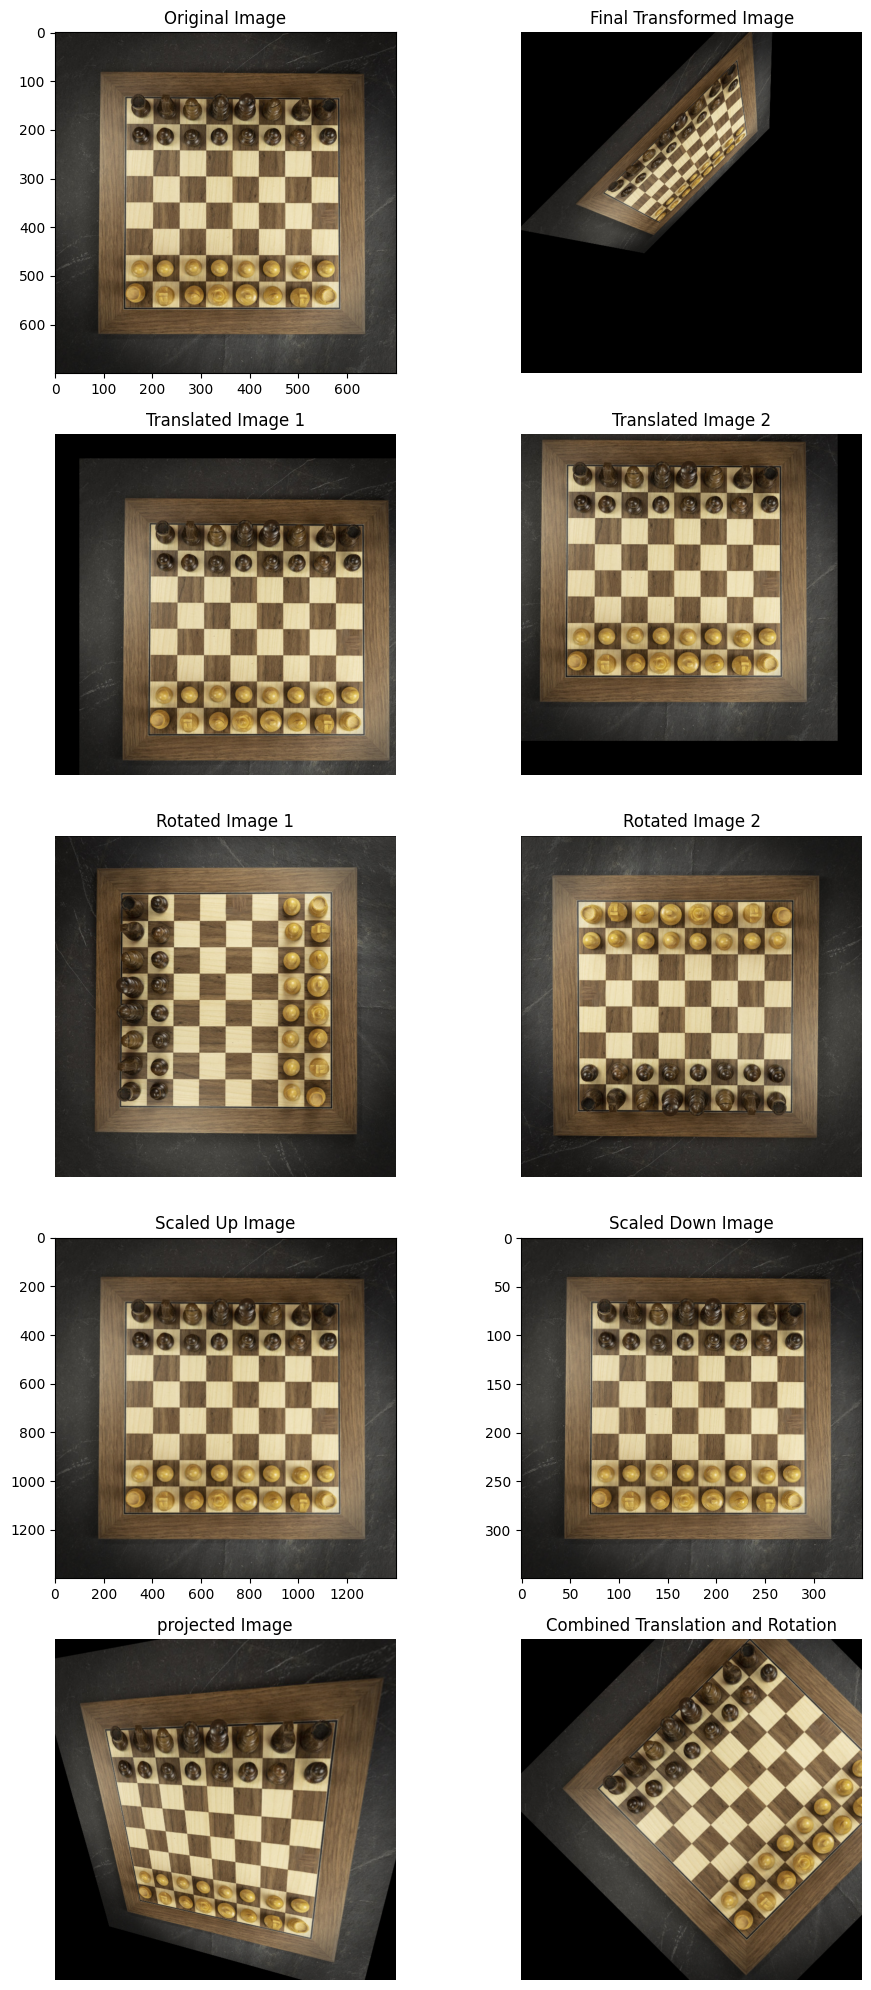

In [100]:
# Grid for plotting
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

# Display the original image and final image
axes[0, 0].imshow(rgb_image)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('on')

axes[0, 1].imshow(final_transformed_image)
axes[0, 1].set_title("Final Transformed Image")
axes[0, 1].axis('off')

# Transformed images
axes[1, 0].imshow(translated_image1)
axes[1, 0].set_title("Translated Image 1")
axes[1, 0].axis('off')

axes[1, 1].imshow(translated_image2)
axes[1, 1].set_title("Translated Image 2")
axes[1, 1].axis('off')

# Rotating images
axes[2, 0].imshow(rotated_image1)
axes[2, 0].set_title("Rotated Image 1")
axes[2, 0].axis('off')

axes[2, 1].imshow(rotated_image2)
axes[2, 1].set_title("Rotated Image 2")
axes[2, 1].axis('off')

# Scaled images
axes[3, 0].imshow(scaled_up_image)
axes[3, 0].set_title("Scaled Up Image")
axes[3, 0].axis('on')

axes[3, 1].imshow(scaled_down_image)
axes[3, 1].set_title("Scaled Down Image")
axes[3, 1].axis('on')

# Projected image
axes[4, 0].imshow(projected_image)
axes[4, 0].set_title("projected Image")
axes[4, 0].axis('off')

# Combined Translation and Rotation image
axes[4, 1].imshow(transformed_image)
axes[4, 1].set_title("Combined Translation and Rotation")
axes[4, 1].axis('off')

plt.tight_layout()
plt.show()

## 3. Detect key points in the original image and all transformed images using SIFT.

## 4. Match the SIFT descriptors using Euclidean distance.

## 5. Visualize the matched points between the two images.

## 6. Compute the homography matrix H between the original image and each transformed image based on the matched key points.

## 7. Compare the computed homography matrix for each transformation with the original transformation matrix H.